c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
   Sigma  Error L1    Error L2       RMSE
0    0.1  0.007054    0.000127   0.011266
1    0.3  0.015984    0.000475   0.021791
2    1.0  0.184143    0.049898   0.223378
3    3.0  0.723205    0.762734   0.873347
4   10.0  4.128531   25.863009   5.085569
5   30.0  9.233432  121.947090  11.042966


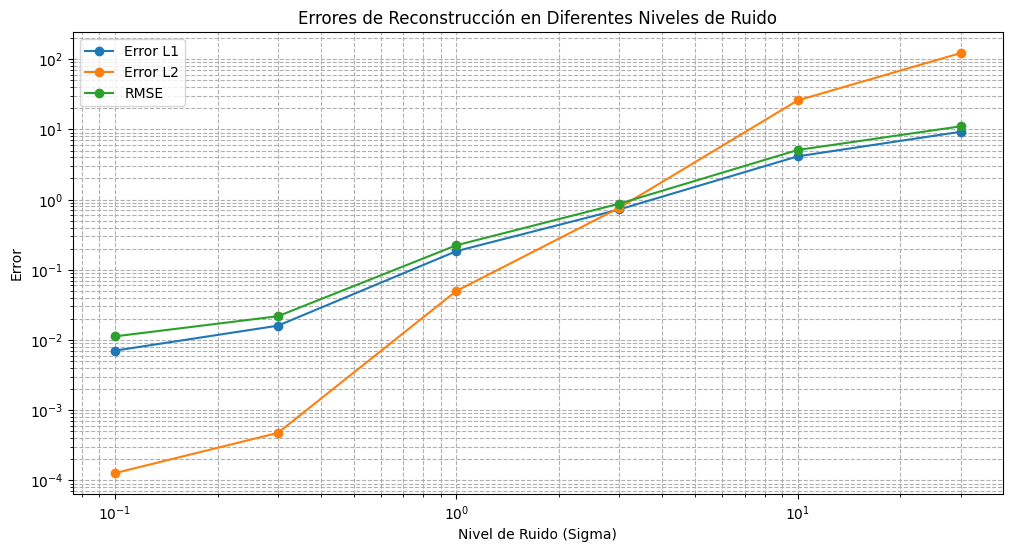

Sigma: 0.1 - Reconstrucción Error: 121.9470899739025, Picos Error: 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parámetros generales
M = 1024
T = 3
fs = M / T
t = np.linspace(0, T, M)
sigma = [0.1, 0.3, 1, 3, 10, 30]  # Distintos niveles de ruido
nperseg = 256  # Número de puntos por segmento para Welch

# Función para generar la señal base
def senal():
    wo = 2 * np.pi
    return (np.cos(wo * 1 * t) - (1/3) * np.sin(wo * 3 * t) + (1/5) * np.cos(wo * 5 * t))

# Función para generar ruido blanco gaussiano
def noise(media, sigma):
    return np.random.normal(media, sigma, size=M)

# Función para calcular la PSD usando Welch
def calcular_psd(senal, fs, nperseg):
    f, Pxx_den = welch(senal, fs=fs, nperseg=nperseg)
    return f, Pxx_den

# Inicialización de variables para almacenar errores
errores_L1 = []
errores_L2 = []
errores_RMSE = []

# Bucle para entrenamiento en diferentes niveles de ruido
for s in sigma:
    # Generar señales con ruido
    x = senal()
    xn = x + noise(0, s)

    # Calcular la PSD de la señal
    f, Pxx = calcular_psd(xn, fs, nperseg)

    # Preparación de los datos
    X = np.array([x, xn])
    y = np.array([Pxx, Pxx])

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Construcción del modelo
    model = Sequential()
    model.add(Dense(128, input_shape=(M,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(nperseg // 2 + 1, activation='linear'))

    # Compilar y entrenar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Predicción en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Cálculo de errores
    L1_error = mean_absolute_error(y_test, y_pred)
    L2_error = np.mean((y_test - y_pred)**2)
    RMSE_error = np.sqrt(mean_squared_error(y_test, y_pred))

    # Almacenar los errores
    errores_L1.append(L1_error)
    errores_L2.append(L2_error)
    errores_RMSE.append(RMSE_error)

# Mostrar los errores en una tabla
import pandas as pd
tabla_errores = pd.DataFrame({
    'Sigma': sigma,
    'Error L1': errores_L1,
    'Error L2': errores_L2,
    'RMSE': errores_RMSE
})
print(tabla_errores)

# Graficar los errores
plt.figure(figsize=(12, 6))
plt.plot(sigma, errores_L1, 'o-', label='Error L1')
plt.plot(sigma, errores_L2, 'o-', label='Error L2')
plt.plot(sigma, errores_RMSE, 'o-', label='RMSE')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Nivel de Ruido (Sigma)')
plt.ylabel('Error')
plt.title('Errores de Reconstrucción en Diferentes Niveles de Ruido')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Mostrar tabla y gráfica para la reconstrucción de la red y detección de picos
def detectar_picos(psd, threshold=0.01):
    return np.where(psd > threshold)[0]

# Comparar reconstrucción y detección de picos
picos_reales = detectar_picos(Pxx)
for s, pred_psd in zip(sigma, y_pred):
    picos_pred = detectar_picos(pred_psd)
    reconstruccion_error = mean_squared_error(Pxx, pred_psd)
    picos_error = len(set(picos_reales) - set(picos_pred))
    print(f"Sigma: {s} - Reconstrucción Error: {reconstruccion_error}, Picos Error: {picos_error}")

# Parámetros libres y comparación de representación muestra a muestra y promedio se pueden ajustar